<a href="https://colab.research.google.com/github/vatsal-agarwal-20/ml-projects/blob/main/mobile_price_classification_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/vatsal-agarwal-20/ml-projects/main/train.csv?token=GHSAT0AAAAAABTKKINYF2ZMVPVACOVHNEQQYTC25WA')

In [24]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [26]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# EXPLORE DATA ANALYSIS

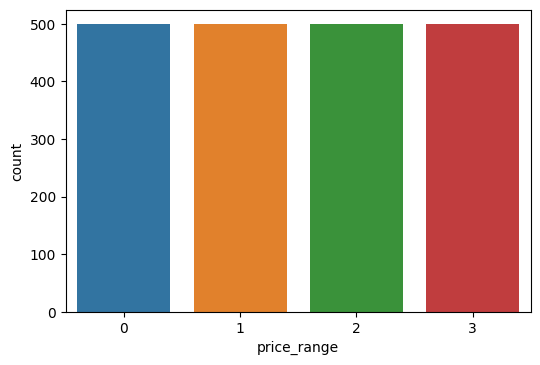

In [27]:
plt.figure(dpi=100)
sns.countplot(x=df['price_range'])

The price_range is balance, with each price_range is 500 count.

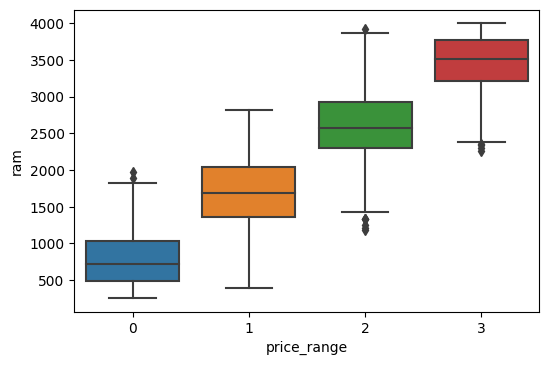

In [28]:
plt.figure(dpi=100)
sns.boxplot(data=df, x='price_range',y='ram')

price_range 0,2, and 3 have outlier. price_range 1 dont have outlier

<Figure size 600x400 with 0 Axes>

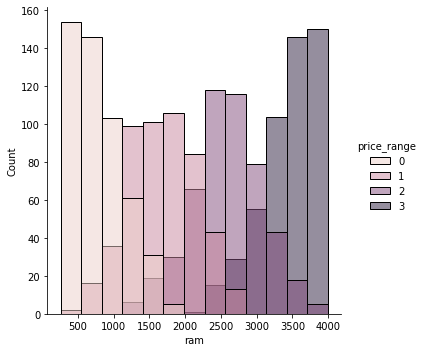

In [29]:
plt.figure(dpi=100)
sns.displot(x=df['ram'], hue=df['price_range'])

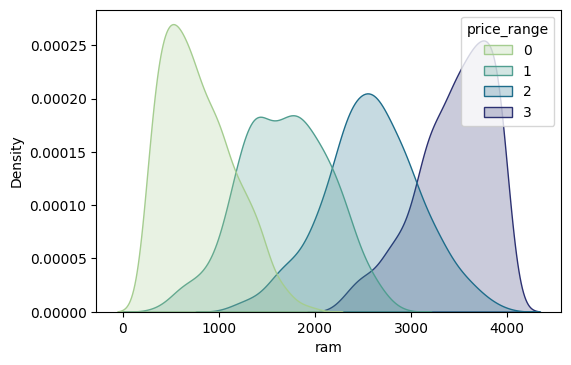

In [30]:
plt.figure(dpi=100)
sns.kdeplot(x=df['ram'], fill=True, hue=df['price_range'], palette='crest')

In [31]:
df.corr()['price_range'].sort_values()

touch_screen    -0.030411
mobile_wt       -0.030302
clock_speed     -0.006606
m_dep            0.000853
n_cores          0.004399
four_g           0.014772
dual_sim         0.017444
wifi             0.018785
blue             0.020573
talk_time        0.021859
fc               0.021998
sc_h             0.022986
three_g          0.023611
pc               0.033599
sc_w             0.038711
int_memory       0.044435
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

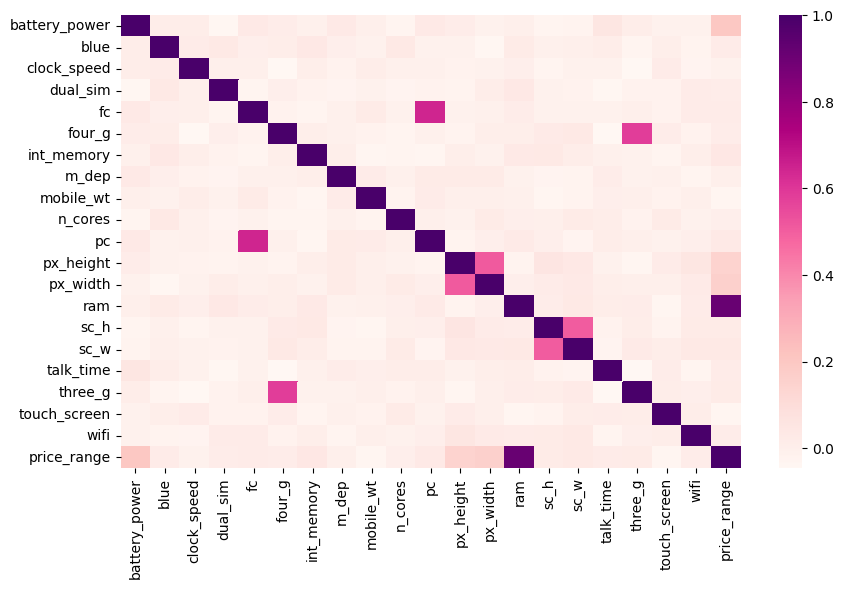

In [32]:
plt.figure(figsize=(10,6), dpi=100)
sns.heatmap(df.corr(), cmap='RdPu')

In [33]:
X = df.drop('price_range',axis = 1)
y = df['price_range']

## DEFINE X and Y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelling

In [34]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

###Decision Tree

In [46]:
dectree=DecisionTreeClassifier(random_state=0)
dectree.fit(X_train,y_train)
prediction=dectree.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.8083333333333333


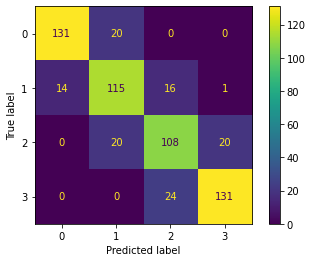

In [47]:
plot_confusion_matrix(dectree,X_test,y_test)
plt.grid(False)
plt.show()

###Logistic Regression

In [57]:
# Logistic Regression
Log= LogisticRegression(random_state=0)
Log.fit(scaled_X_train,y_train)
log_pred = Log.predict(scaled_X_test)

In [58]:
#Confusion Matrix
confusion_matrix(y_test,log_pred)

array([[144,   7,   0,   0],
       [  3, 142,   1,   0],
       [  0,   7, 135,   6],
       [  0,   0,   1, 154]])

In [59]:
print("Classification Report : Logistic Regression")
print(classification_report(y_test,log_pred))

Classification Report : Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       151
           1       0.91      0.97      0.94       146
           2       0.99      0.91      0.95       148
           3       0.96      0.99      0.98       155

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



### Multi Layer Perceptron

In [43]:
mlp=MLPClassifier(alpha=1, max_iter=500,random_state=0).fit(X_train,y_train)
y_prediction = mlp.predict(X_test)
print("The accuracy of the model on validation set is",metrics.accuracy_score(y_prediction,y_test))

The accuracy of the model on validation set is 0.6733333333333333


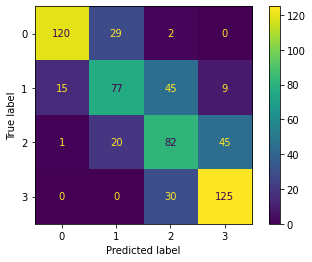

In [44]:
plot_confusion_matrix(mlp,X_test,y_test)
plt.grid(False)
plt.show()

###SVM 

In [45]:
types=['rbf','linear']
for i in types:
    SVM=svm.SVC(kernel=i)
    SVM.fit(X_train,y_train)
    prediction=SVM.predict(X_test)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,y_test))

Accuracy for SVM kernel= rbf is 0.9533333333333334
Accuracy for SVM kernel= linear is 0.9733333333333334


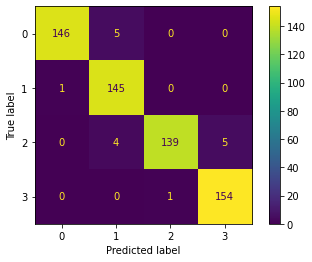

In [49]:
plot_confusion_matrix(SVM,X_test,y_test)
plt.grid(False)
plt.show()

### Adaboost Algorithm

In [50]:
adab = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 100, random_state= 0)
adab.fit(X_train,y_train)
y_predict= adab.predict(X_test)
print("The accuracy of the model on validation set is",metrics.accuracy_score(y_predict,y_test))

The accuracy of the model on validation set is 0.735


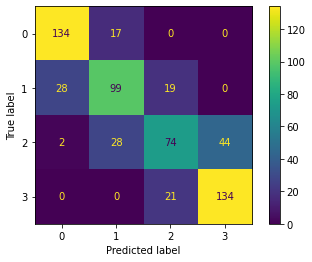

In [51]:
plot_confusion_matrix(adab,X_test,y_test)
plt.grid(False)
plt.show()

### Random Forest

In [52]:
ranF = RandomForestClassifier(criterion= 'entropy', n_estimators= 300, random_state= 0)
ranF.fit(X_train, y_train)
y_pred = ranF.predict(X_test)
print("The accuracy of the model on validation set is",metrics.accuracy_score(y_pred,y_test))

The accuracy of the model on validation set is 0.8866666666666667


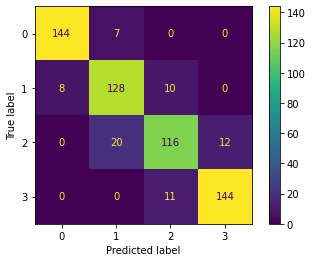

In [53]:
plot_confusion_matrix(ranF,X_test,y_test)
plt.grid(False)
plt.show()

### K-Means Clustering

In [56]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=1, random_state=0).fit(X_train)
y_mean = kmean.predict(X_test)
print("The accuracy of the model on validation set is",metrics.accuracy_score(y_mean,y_test))


The accuracy of the model on validation set is 0.25166666666666665


In [57]:
print(confusion_matrix(y_test,y_mean))

[[151   0   0   0]
 [146   0   0   0]
 [148   0   0   0]
 [155   0   0   0]]


### PCA

### Balanced and Unbalanced Datasets

### Comparison of Machine Learning Algorithms

In [58]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','Decision Tree','MLP','Random Forest','Adaboost','K-means']
models=[
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf'),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(random_state=0),
    MLPClassifier(alpha=1, max_iter=500,random_state=0),
    RandomForestClassifier(criterion= 'entropy', n_estimators= 300, random_state= 0),
    AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 100, random_state= 0),
    KMeans(n_clusters=1, random_state=0)]

for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.973333
Radial Svm,0.953333
Logistic Regression,0.635000
Decision Tree,0.808333
MLP,0.673333
Random Forest,0.886667
Adaboost,0.735000
K-means,0.251667
